In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv("Transmission_Lines.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SN              307 non-null    int64  
 1   from            307 non-null    object 
 2   to              307 non-null    object 
 3   voltage_kv      307 non-null    int64  
 4   length_km       307 non-null    float64
 5   circuit_type    307 non-null    object 
 6   conductor_type  305 non-null    object 
 7   conductor_size  303 non-null    object 
 8   circuit_km      307 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 21.7+ KB


In [3]:
# Basic statistics of transmission lines
print("Basic Statistics of Transmission Lines:")
print("\nVoltage Levels Summary:")
display(df['voltage_kv'].value_counts().sort_index())

print("\nCircuit Types Distribution:")
print(df['circuit_type'].value_counts())

print("\nLength Statistics (km):")
display(df['length_km'].describe())

print("\nTotal Circuit Kilometers by Voltage Level:")
voltage_circuit_km = df.groupby('voltage_kv')['circuit_km'].sum()
display(voltage_circuit_km)

Basic Statistics of Transmission Lines:

Voltage Levels Summary:


voltage_kv
132    234
230     54
400     19
Name: count, dtype: int64


Circuit Types Distribution:
circuit_type
Double    197
Single     83
Four       27
Name: count, dtype: int64

Length Statistics (km):


count    307.000000
mean      28.004484
std       32.649211
min        0.120000
25%        4.635500
50%       16.500000
75%       41.750000
max      217.200000
Name: length_km, dtype: float64


Total Circuit Kilometers by Voltage Level:


voltage_kv
132    8877.299
230    4263.490
400    2481.780
Name: circuit_km, dtype: float64

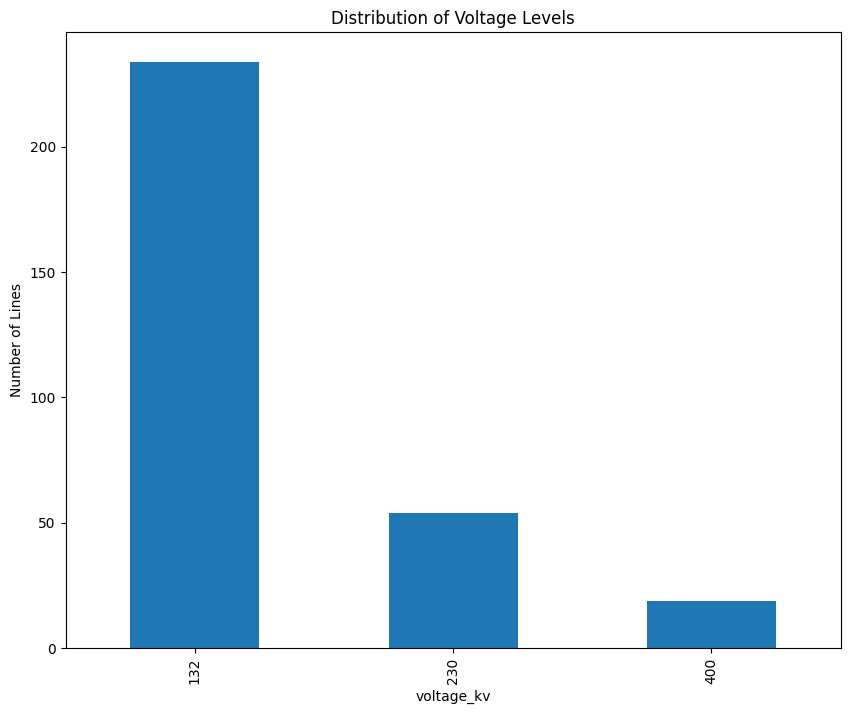

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Distribution of Voltage Levels')
ax.set_xlabel('Voltage (kV)')
ax.set_ylabel('Number of Lines')
df['voltage_kv'].value_counts().plot(kind='bar', ax=ax)

plt.show()

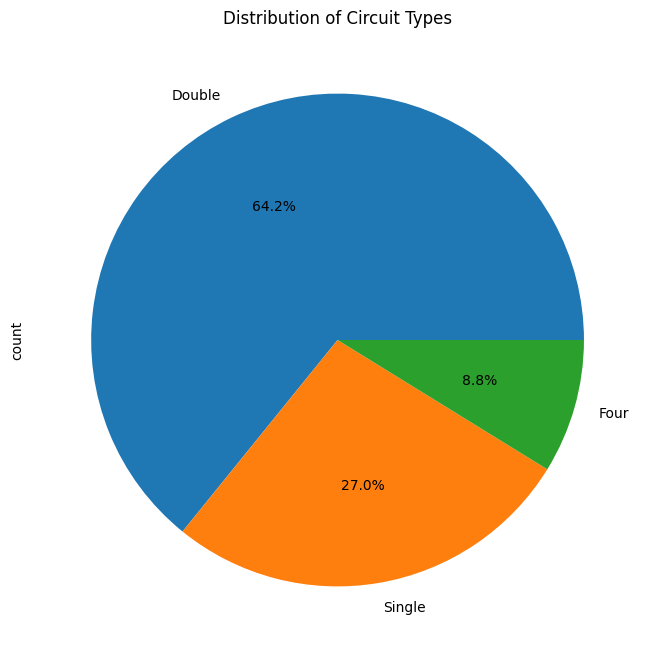

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

df['circuit_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_title('Distribution of Circuit Types')


plt.show()

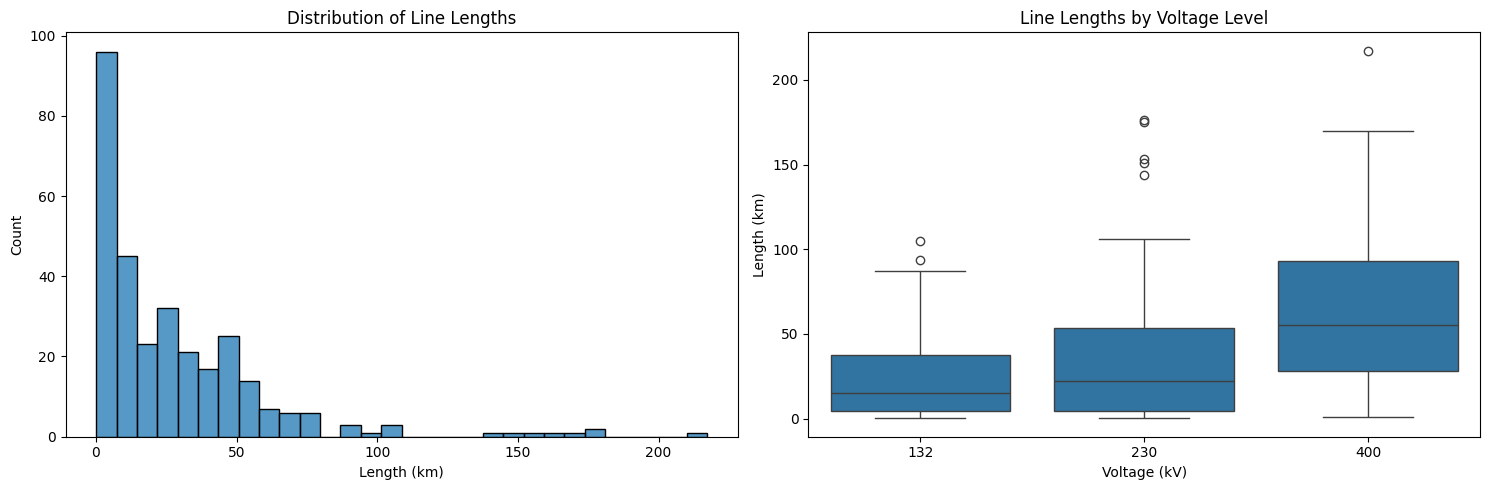

In [5]:
# 4. Length Analysis
plt.figure(figsize=(15, 5))

# Subplot 1: Length Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='length_km', bins=30)
plt.title('Distribution of Line Lengths')
plt.xlabel('Length (km)')

# Subplot 2: Box Plot of Lengths by Voltage
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='voltage_kv', y='length_km')
plt.title('Line Lengths by Voltage Level')
plt.xlabel('Voltage (kV)')
plt.ylabel('Length (km)')

plt.tight_layout()
plt.show()

In [6]:
# 5. Analyze major transmission lines
print("\nTop 10 Longest Transmission Lines:")
display(df.nlargest(10, 'length_km')[['from', 'to', 'voltage_kv', 'length_km', 'circuit_type']])


Top 10 Longest Transmission Lines:


,from,to,voltage_kv,length_km,circuit_type
17,Madunaghat,Meghnaghat,400,217.20,Single
35,Khulna,HVDC Bheramara,230,176.50,Double
19,Ghorasal,Ishurdi,230,175.00,Double
3,Bibiyana,Kaliakoir,400,169.53,Double
5,Payra,Gopalganj (N),400,163.55,Double
42,Bibiyana,Comilla (N),230,153.55,Double
28,Comilla (N),Hathazari,230,151.00,Double
34,Ashuganj,Sirajganj,230,144.00,Double
37,Bogura,Barapukuria,230,106.00,Double
136,Bheramara,Faridpur,132,105.00,Double


In [7]:
# 6. Network Analysis
# Get unique substations (nodes)
substations = set(df['from'].unique()) | set(df['to'].unique())

# Calculate substation connections
substation_connections = {}
for station in substations:
    connections = df[df['from'].str.contains(station, na=False) | 
                    df['to'].str.contains(station, na=False)].shape[0]
    substation_connections[station] = connections

/tmp/ipykernel_10575/1831648672.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  connections = df[df['from'].str.contains(station, na=False) |
/tmp/ipykernel_10575/1831648672.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['to'].str.contains(station, na=False)].shape[0]


In [8]:
len(substations)

258

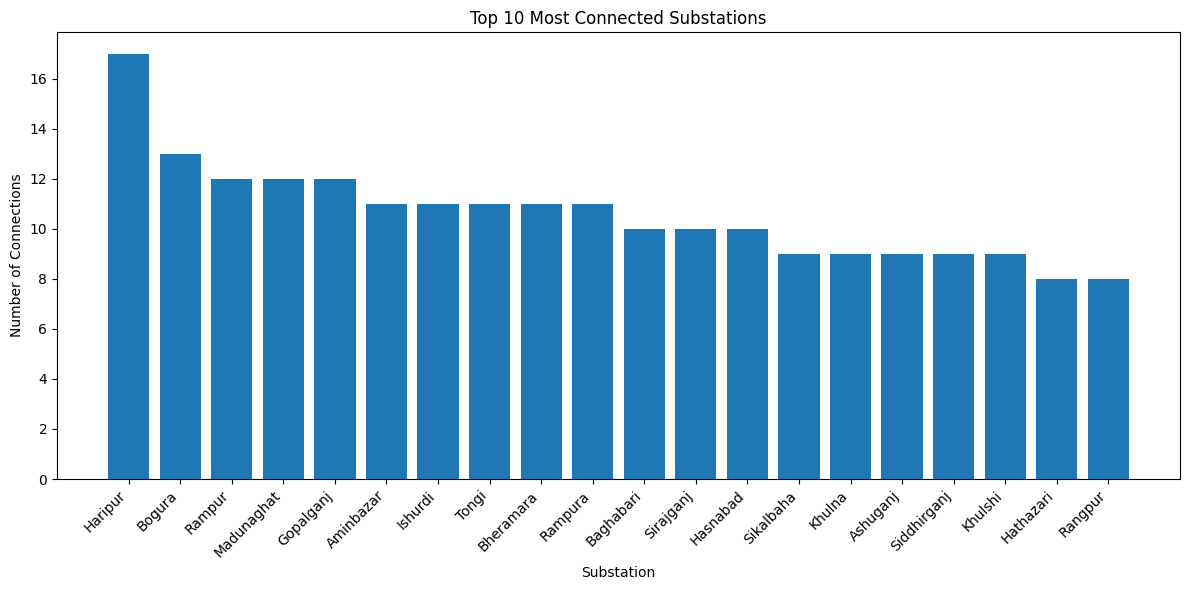


Top 10 Most Connected Substations:
Haripur: 17 connections
Bogura: 13 connections
Rampur: 12 connections
Madunaghat: 12 connections
Gopalganj: 12 connections
Aminbazar: 11 connections
Ishurdi: 11 connections
Tongi: 11 connections
Bheramara: 11 connections
Rampura: 11 connections
Baghabari: 10 connections
Sirajganj: 10 connections
Hasnabad: 10 connections
Sikalbaha: 9 connections
Khulna: 9 connections
Ashuganj: 9 connections
Siddhirganj: 9 connections
Khulshi: 9 connections
Hathazari: 8 connections
Rangpur: 8 connections


In [9]:
top_connected = dict(sorted(substation_connections.items(), 
                          key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(12, 6))
plt.bar(top_connected.keys(), top_connected.values())
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Connected Substations')
plt.xlabel('Substation')
plt.ylabel('Number of Connections')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Connected Substations:")
for station, connections in top_connected.items():
    print(f"{station}: {connections} connections")

In [10]:
# Create nodes list containing unique station names from both 'from' and 'to' columns
nodes = sorted(list(set(df['from'].unique()) | set(df['to'].unique())))

for n in nodes:
    print(n)

AES Haripur
AKSML
AKSPL
Aftabnagar
Agrabad
Aminbazar
Amnura
Amnura PP
Anowara
Ashuganj
Ashuganj (N)
BSRM
Bagerhat
Bagerhat single circuit at Labanchora PP
Baghabari
Baghabari -Ishurdi line
Bakerganj
Bakulia
Banani
Bangabhaban
Bangladesh Border (Baharampur)
Bangladesh Border (Comilla)
Bangura
Banskhali
Barapukuria
Barguna
Barguna PP
Barishal
Barishal (N)
Barmi (BR Powergen)
Baroaulia
Baroirhat
Bashundhara
Beanibazar
Benapole
Bera PP
Bhaluka
Bhandaria
Bheramara
Bhola
Bhulta
Bibiyana
Bogura
Bogura (W)
BoguraNew
BoguraOld
Brahmanbaria
Cantonment
Chandpur
Chandraghona
Chapai Nawabganj
Char Saidpur
Chhatak
Chowddagram
Chowmuhani
Chuadanga
Comilla (N)
Comilla (S)
Confidence PP
Cox's Bazar
Daudkandi
Daudkandi PP
Dhaka University (DU)
Dhamrai
Dhanmondi
Dohazari
Energaon
Faridpur
Faridpur -Bheramara
Faridpur PP
Fatullah
Fenchuganj
Fenchuganj PS
Feni
Four circuit
Gallamari
Ghorasal
Goalpara
Gopalganj
Gopalganj (N)
Gopalganj PP
Gulshan
HVDC Bheramara
Halishahar
Halishahar LILO
Haripur
Hasnabad
Has

In [11]:
print(len(nodes))

258
